In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()
X= iris.data
y= iris.target

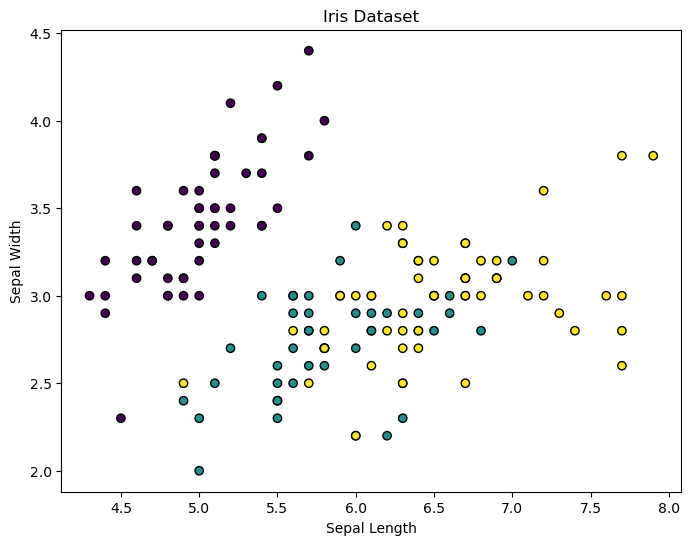

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1],c=y,cmap='viridis',edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset')
plt.show()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
def ed(d1,d2):
    return np.sqrt(np.sum(d1-d2)**2)
    

In [7]:
def k_nearest(X_train,y_train,x_test,k):
    distances = [ed(x_test,x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    most_common = np.bincount(k_nearest_labels).argmax()
    return most_common

In [8]:
def predict_k(X_train, y_train, X_test, k):
    predictions = [k_nearest(X_train, y_train, x_test,k) for x_test in X_test]
    return np.array(predictions)

In [9]:
k_values = range(1, 21)
accuracy_scores = []

In [10]:
for k in k_values:
    predictions_scratch=predict_k(X_train, y_train, X_test, k)
    accuracy = accuracy_score(y_test, predictions_scratch)
    accuracy_scores.append(accuracy)

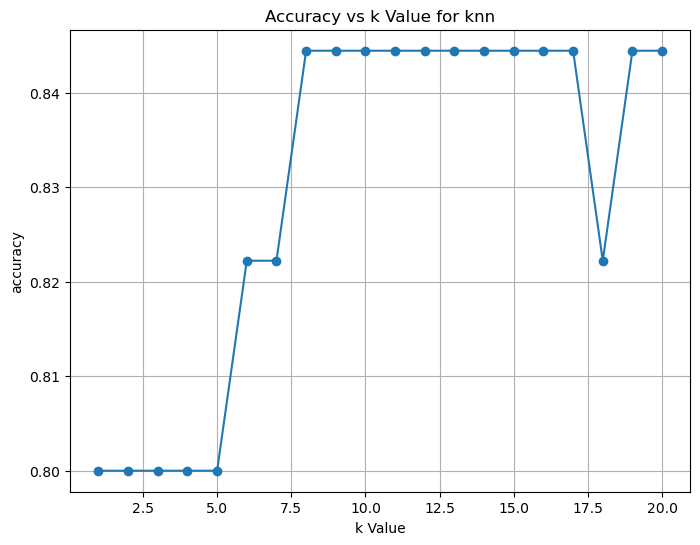

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores,marker='o')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.title('Accuracy vs k Value for knn')
plt.grid(True)
plt.show()

In [13]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
predictions=knn.predict(X_test)

In [17]:
accuracy=accuracy_score(y_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy *100))

Accuracy: 100.00%
